# <font color='blue'>Week 8 - Machine Learning Intro</font>

### <font color='red'> Used: Python and its libraries; NumPy and Pandas library. Google Colaboratory and Jupyter Notebook. </font>


**Agenda: Linear Regression on google colab**


In [2]:
import pandas as pd
import matplotlib.pyplot as matpltlibpyplt
%matplotlib inline

**Uploading the file from your local disk**

In [144]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.data to auto-mpg (3).data


**Add the column names ['MPG','Cylinders','Displacement','Horsepower', Weight', 'Acceleration', 'Model Year', 'Origin'] to the read dataframe**

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv('auto-mpg.data', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [198]:
df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
62,13.0,8,350.0,165.0,4274.0,12.0,72,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,2
270,21.1,4,134.0,95.0,2515.0,14.8,78,3
119,20.0,4,114.0,91.0,2582.0,14.0,73,2
274,20.3,5,131.0,103.0,2830.0,15.9,78,2


**Print all columns**

O/P is:
 Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
      'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [199]:
df.columns
df.columns.values

array(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'], dtype=object)

o/p is (398, 8)

In [200]:
df.shape

(398, 8)

o/p is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [202]:
df.Horsepower.count()

392

In [203]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [204]:
df.isna().iloc[:,[3]].sum()

Horsepower    6
dtype: int64

Select all the rows, and 4th, 5th and 7th column:
df.iloc[:,[3,4,6].head(5)


https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [205]:
df.iloc[:,[3]].isna().sum()


Horsepower    6
dtype: int64

replace these 6 value to "mean value" by:

In [206]:
df.iloc[:,[3]]

,Horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [0]:
# fill missing values with mean column values
# df.fillna(dataset.mean(), inplace=True)

**Fill the Horsepower missing records with median of the column**

ref: https://machinelearningmastery.com/handle-missing-data-python/

In [0]:
# mark zero values as missing or NaN
# dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)


In [209]:
df.iloc[:,[3]].isna().sum() #success all 6 empty filled up.

Horsepower    0
dtype: int64

O/P must be:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      398 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


O/P must be:

	MPG	Cylinders	Displacement	Horsepower	Weight	Acceleration	Model Year	Origin
0	18.0	8	307.0	130.0	3504.0	12.0	70	1
1	15.0	8	350.0	165.0	3693.0	11.5	70	1
2	18.0	8	318.0	150.0	3436.0	11.0	70	1
3	16.0	8	304.0	150.0	3433.0	12.0	70	1
4	17.0	8	302.0	140.0	3449.0	10.5	70	1


In [211]:
#original df is like:
df.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


**Add 3 columns for the 'Origin' column in the dataset by mapping 1 to 'USA', 2 to 'Europe' and 3 to 'Japan'**

In [0]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'}) 
df = pd.get_dummies(df, prefix='', prefix_sep='')

In [213]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [214]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


O/P must be : Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [215]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

**Split the data in Y (MPG dependent variable and X (All other columns))**

In [0]:
y=df.MPG
x=df.iloc[:,[1,2,3,4,5,6,7,8,9]]

In [217]:
x.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [218]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [219]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


### **Split the data**

**Split the data in training and testing** 

In [0]:
#no need)
#new way as per Module-8.ipynb

In [0]:
#no need 
train_dataset = df.sample(frac=0.8,random_state=1029)
test_dataset = df.drop(train_dataset.index) # INDEX is 1st line already exist see above sample of df.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Train the model using the training sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=1029)

### **Inspect the data**

In [0]:
import seaborn

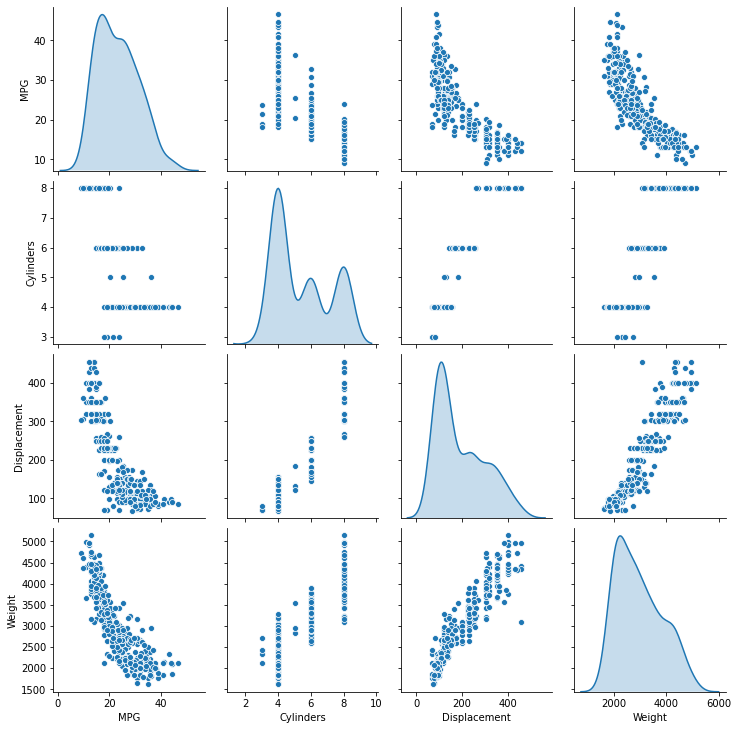

In [225]:
seaborn.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde") 

In [226]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.175879,0.198492,0.625628
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.381197,0.399367,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [227]:
test_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,23.791250,5.500000,189.037500,101.437500,2933.38750,15.817500,76.225000,0.150000,0.262500,0.58750
std,7.452265,1.728393,99.409706,34.649728,802.29223,2.665997,3.645615,0.359324,0.442769,0.49539
min,11.000000,4.000000,78.000000,46.000000,1795.00000,8.000000,70.000000,0.000000,0.000000,0.00000
25%,18.750000,4.000000,107.000000,75.000000,2285.50000,14.000000,73.000000,0.000000,0.000000,0.00000
50%,22.500000,4.000000,146.000000,91.500000,2802.50000,15.500000,76.000000,0.000000,0.000000,1.00000
75%,29.000000,8.000000,302.000000,121.250000,3553.50000,17.700000,79.000000,0.000000,1.000000,1.00000
max,43.100000,8.000000,429.000000,208.000000,4633.00000,21.800000,82.000000,1.000000,1.000000,1.00000


In [228]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.444969,5.443396,194.529874,105.232127,2979.742138,15.505346,75.955975,0.182390,0.182390,0.635220
std,7.914676,1.696611,105.579876,39.055310,858.649576,2.780850,3.714319,0.386774,0.386774,0.482127
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.500000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,101.750000,76.000000,2220.000000,13.525000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,151.000000,95.000000,2803.500000,15.450000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,260.000000,125.000000,3611.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [229]:
temp_view_stat = train_dataset.describe()
temp_view_stat.transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,318.0,23.444969,7.914676,9.0,17.000,23.00,29.0,46.6
Cylinders,318.0,5.443396,1.696611,3.0,4.000,4.00,8.0,8.0
Displacement,318.0,194.529874,105.579876,68.0,101.750,151.00,260.0,455.0
Horsepower,318.0,105.232127,39.055310,46.0,76.000,95.00,125.0,230.0
Weight,318.0,2979.742138,858.649576,1613.0,2220.000,2803.50,3611.0,5140.0
Acceleration,318.0,15.505346,2.780850,8.5,13.525,15.45,17.0,24.8
Model Year,318.0,75.955975,3.714319,70.0,73.000,76.00,79.0,82.0
Europe,318.0,0.182390,0.386774,0.0,0.000,0.00,0.0,1.0
Japan,318.0,0.182390,0.386774,0.0,0.000,0.00,0.0,1.0
USA,318.0,0.635220,0.482127,0.0,0.000,1.00,1.0,1.0


In [230]:
temp1_view_stat = train_dataset.describe()

temp2_view_stat = temp1_view_stat.drop(columns='MPG')
temp2_view_stat =  temp2_view_stat.transpose()

temp2_view_stat

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.443396,1.696611,3.0,4.000,4.00,8.0,8.0
Displacement,318.0,194.529874,105.579876,68.0,101.750,151.00,260.0,455.0
Horsepower,318.0,105.232127,39.055310,46.0,76.000,95.00,125.0,230.0
Weight,318.0,2979.742138,858.649576,1613.0,2220.000,2803.50,3611.0,5140.0
Acceleration,318.0,15.505346,2.780850,8.5,13.525,15.45,17.0,24.8
Model Year,318.0,75.955975,3.714319,70.0,73.000,76.00,79.0,82.0
Europe,318.0,0.182390,0.386774,0.0,0.000,0.00,0.0,1.0
Japan,318.0,0.182390,0.386774,0.0,0.000,0.00,0.0,1.0
USA,318.0,0.635220,0.482127,0.0,0.000,1.00,1.0,1.0


In [231]:
df.shape

(398, 10)

In [232]:
train_dataset.shape

(318, 10)

In [233]:
test_dataset.shape

(80, 10)

### **Normalize the data**

In [0]:
# normalization: This is the way it works interm so of calculation.
# normalization by definition/formula in Math. a-b / c

def norm(x):
  return (x - temp2_view_stat['mean']) / temp2_view_stat['std']  


normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### **Build the model**

Let's build our model using Keras Model Configuration: Neural Network API- Tensors flow

https://www.tensorflow.org/tutorials/keras/regression


https://datascienceplus.com/keras-regression-based-neural-networks/

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


**Build Linear Regression Model and print Mean absolute error, Mean squared error and Prediction Error [MPG] like the lecture module**



In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]), # 64=neurons=graphical
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

## **Inspect the model**

In [238]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [239]:
example_batch = normed_train_data[:]
exmple_result=model.predict(example_batch)
exmple_result

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [0]:
#Linear Regression in SKLearn
from sklearn.linear_model import LinearRegression

In [0]:
# Create linear regression object
myLinReg = LinearRegression()



In [242]:
# myLinReg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) 
# you can do false as well-for Normalization

myLinReg  ##myLinReg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
myLinReg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
print("intercept is   : ", myLinReg.intercept_)
print("coefficient is : ", myLinReg.coef_)

intercept is   :  -15.988782732565507
coefficient is :  [-0.47517903  0.02792932 -0.01831079 -0.0071414   0.08557411  0.78273656
  0.85877417  1.12472308 -1.98349725]


In [249]:
predict_price = myLinReg.predict(x_test)
predict_price

array([28.05521657, 24.43734931, 27.18912283, 35.37653958, 25.93694673,
       14.6806393 , 33.52399243, 19.26613418, 25.44072758, 10.86078302,
       12.48365311,  7.91571846, 30.66882652, 20.24835724, 19.59847377,
       34.82787818, 21.70146718, 30.07272545, 28.72283263, 26.09383713,
       16.62058326, 31.90739199, 17.89347964, 25.51299553,  7.96281345,
       24.01441481, 11.92245101, 23.54004982, 31.08675515, 15.11879378,
       21.97325931, 34.89542476, 31.84124433, 26.34926313, 22.28253291,
       32.03496337, 19.80152637, 24.92240149, 30.73108734, 20.20504298,
       23.08954239, 21.23722709, 16.01285661, 18.23123293, 30.2648054 ,
       32.88042078, 30.79187915, 18.06193264, 33.44194011, 36.04502028,
       26.09774316, 16.69465036, 21.65997086, 22.18939316, 29.32243229,
        9.3420625 , 24.76211864, 26.76779308, 15.08807759, 20.38760933,
       26.94842764, 28.56649769, 27.90977958, 29.80616455, 16.90295522,
       20.42118796, 12.80075428, 28.88025146, 20.22409916, 30.22

In [250]:
x_test.head(3)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
269,4,105.0,75.0,2230.0,14.5,78,0,0,1
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
360,6,145.0,76.0,3160.0,19.6,81,1,0,0


In [251]:
y_test.head(3)

269    30.9
254    20.2
360    30.7
Name: MPG, dtype: float64

In [0]:
from sklearn import metrics

In [256]:
print("MSE: ",metrics.mean_squared_error(y_test,predict_price))
print("MAE: ",metrics.mean_absolute_error(y_test,predict_price))

MSE:  10.622377260561644
MAE:  2.5758705101444996


In [0]:
# error how much?

In [259]:
error = (predict_price-y_test)
error

269   -2.844783
254    4.237349
360   -3.510877
347   -1.623460
29    -1.063053
         ...   
179    1.468895
174    2.812527
185    0.316297
196    3.190596
49    -0.121933
Name: MPG, Length: 120, dtype: float64

In [0]:
#plot thr graph error vs count

Text(0, 0.5, 'count')

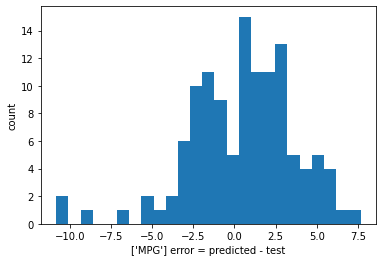

In [272]:
matpltlibpyplt.hist(error, bins=25)
matpltlibpyplt.xlabel("['MPG'] error = predicted - test")
matpltlibpyplt.ylabel("count")